In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing Dataset for Canada

In [2]:
df = pd.read_excel("Canada.xlsx")
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


#### As lots of column names are in Integer, i.e 1980...2013. Covert those column names into String

In [3]:
df.columns = df.columns.astype(str)

In [4]:
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


#### Delete Unwanted Columns

In [5]:
df.drop(['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'], axis=1, inplace=True)

In [6]:
df.rename(columns={'OdName':'Country'}, inplace=True)

In [7]:
df.head(2)

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603


#### Set Country as Index

In [8]:
df = df.set_index("Country")

In [9]:
df.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603


#### Capturing Year names in a seperate variable

In [10]:
years = df.columns.values.tolist()

In [11]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#### How Migrants from Haiti are migrated into canada over years 1980 to 2013

In [12]:
haiti = df.loc['Haiti', years]  # It will return a series

In [13]:
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: int64

#### Visualize for Haiti how migrants migrated into Canada

##### Line Plot only can be plotted based on a Series

Column Names or Array Indexes will be plotted per X Axis<br>Values will be plotted per Y axis

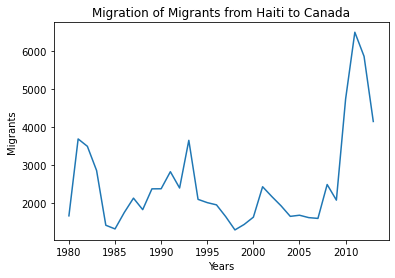

In [14]:
haiti.plot(kind='line')
plt.xlabel("Years") #Name of X axis
plt.ylabel("Migrants") #Name of Y axis
plt.title("Migration of Migrants from Haiti to Canada") # Title
plt.show()

In [15]:
#### How Migrants from Cambodia are migrated into canada over years 1980 to 2013

In [16]:
cambodia = df.loc["Cambodia", years]

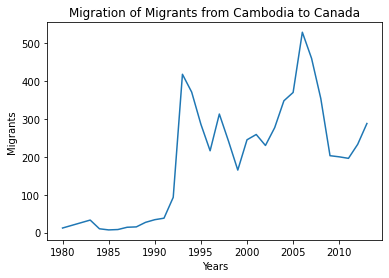

In [17]:
cambodia.plot(kind='line')
plt.xlabel("Years") #Name of X axis
plt.ylabel("Migrants") #Name of Y axis
plt.title("Migration of Migrants from Cambodia to Canada") # Title
plt.show()

#### Compare between multiple plots

Migrants from Austria

In [18]:
austria = df.loc["Austria", years]

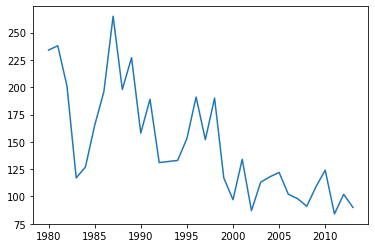

In [19]:
austria.plot(kind="line")

Migrants from Barbados

In [20]:
barbados = df.loc["Barbados", years]

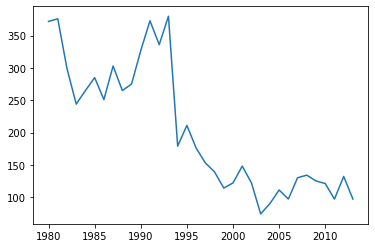

In [21]:
barbados.plot(kind="line")

Migrants from Belgium

In [22]:
belgium = df.loc["Belgium", years]

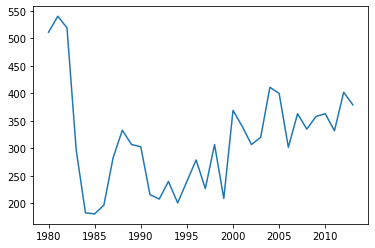

In [23]:
belgium.plot(kind="line")

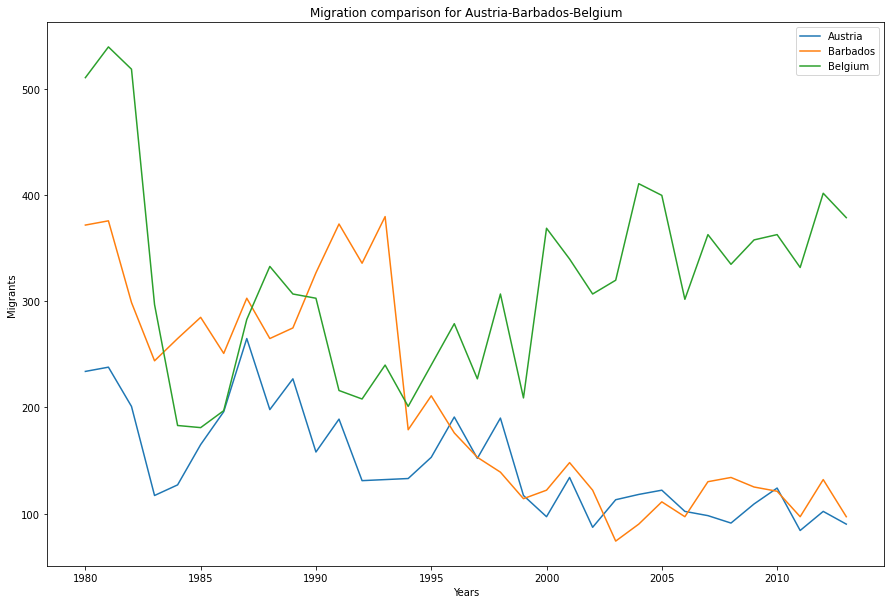

In [24]:
plt.figure(figsize=(15,10))
austria.plot(kind="line")
barbados.plot(kind="line")
belgium.plot(kind="line")
plt.legend()  #Specify which color for which line
plt.xlabel("Years") #Name of X axis
plt.ylabel("Migrants") #Name of Y axis
plt.title("Migration comparison for Austria-Barbados-Belgium") # Title
plt.show()

#### Provide a text in Visualization Indication something

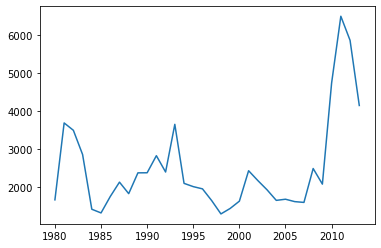

In [25]:
haiti.plot(kind="line")

You can see a heavy increa of migration after 2010. It beacuase of Earth Quake. If you want to mark a text over there

In [26]:
plt.figure(figsize=(8,8))
haiti.plot(kind="line")
plt.xlabel("Years") 
plt.ylabel("Migrants") 
plt.title("Migration from Haiti to Canada") 
plt.text("2010", 6000, "Earth Quake")  # Plotting a Text
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2010'

<Figure size 576x576 with 1 Axes>

It Couldn't be done because plotting of a point can be done when both X value and Y value are Numeric<br>Here X value, i.e Column Name is in String<br>Y value, i.e migrant count is in Integer

In [27]:
haiti.head(5)

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: int64

Convert index into Integer

In [28]:
haiti.index = haiti.index.astype(int)

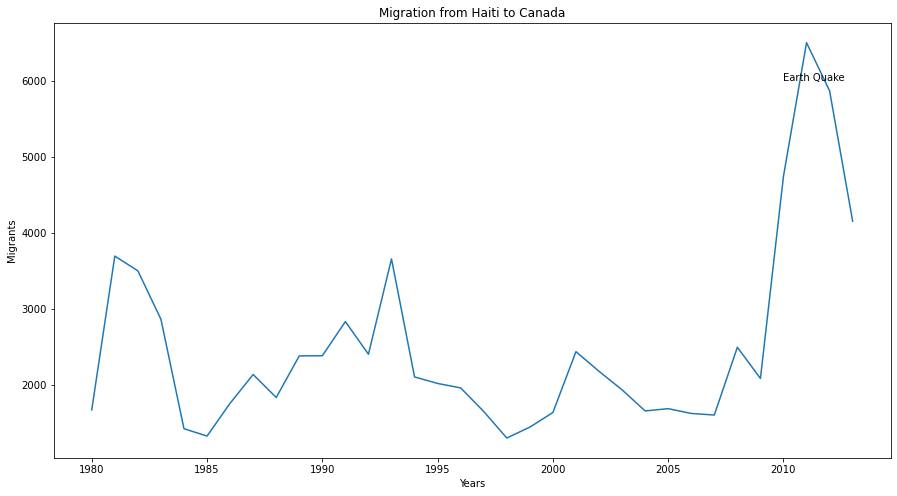

In [29]:
plt.figure(figsize=(15,8))
haiti.plot(kind="line")
plt.xlabel("Years") 
plt.ylabel("Migrants") 
plt.title("Migration from Haiti to Canada") 
plt.text(2010, 6000, "Earth Quake")  # Plotting a Text
plt.show()